# Neutron beam in a slab shield

<H3> 2 Slab layers, with constant cross section, with the first slab having 2 MFP and the second 1 MFP <H3>

1° Layers $ \Sigma_{t} = \Sigma_{s} $ (Scatter only)

2° Layers $ \Sigma_{t} = \Sigma_{a} $ (Absorption only)

Equation to find the position:

$ x = -ln(\xi)$

# Libery import 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as norm
import statistics as st

# Import of data ( Fortran random number)

In [4]:
dados= pd.read_csv('data/out.txt')
dados.columns=['random']
dados.head()
dados.shape

(4596923, 1)

# Program

In [6]:
pxr= [];pzr = [];pyr=[]
pxs= [];pzs = []; pys=[]
pxt= [];pzt = [];pyt=[]
pxa= [];pza = [];pya=[]

z1 =2.0;z2=1.0 
ns =1000000
na = 0; nr=0;nl = 0  
j=0
for i in range(ns):
    u=0.; v=0.0; w = 1.0
    x=0.; y=0.0;  z=-z1
    zc = z
    while(zc>=-z1 and zc<=0.0):
        rnd = dados.random[j] 
        j+=1
        d = -np.log(rnd) # equation 1
        xc = x+d*u; yc=y+d*v; zc = z+d*w 
        if(zc < -z1):
            pxr.append(xc);pzr.append(zc);pyr.append(yc)
            nl+=1
        elif(zc<=0):
            pxs.append(xc);pzs.append(zc);pys.append(yc)
            costh = 2.* dados.random[j+1]-1
            phi =dados.random[j+2]*2.*np.pi
            sinth = (1.0-costh**2)**1/2
            u =np.cos(phi)*sinth; v = np.sin(phi)*sinth;w = costh
            
            x=xc;y=yc;z=zc
        elif(zc>z2):
            pxt.append(xc);pzt.append(zc);pyt.append(yc)
            nr +=1
        else:
            pxa.append(xc);pza.append(zc);pya.append(yc)
            na += 1
           

StDevA = np.sqrt(na*(ns-na)/ns)        
StDevR = np.sqrt(nr*(ns-nr)/ns)
StDevL = np.sqrt(nl*(ns-nl)/ns)
print('Nº of particle absorbed = ',na,' ± ',StDevA)
print('Nº of particle transmitted = ',nr,' ± ',StDevR)
print('Nº of particle reflected = ',nl,' ± ',StDevL)


<ipython-input-6-4a89be9fc775>:17: RuntimeWarning: divide by zero encountered in log
  d = -np.log(rnd) # equation 1


Nº of particle absorbed =  409195  ±  491.6853180388855
Nº of particle transmitted =  139188  ±  346.14260161962153
Nº of particle reflected =  451617  ±  497.65357962241166


# Getting the position of particles absorbed

In [ ]:
with open(r'data/position.txt', 'w') as fp:
    for item in pxa:
        fp.write("%s\n" % item)
    print('OK')

OK


# Slab position graphics

Text(0.5, 1.0, 'Total Neutron Position of (10⁶) beams')

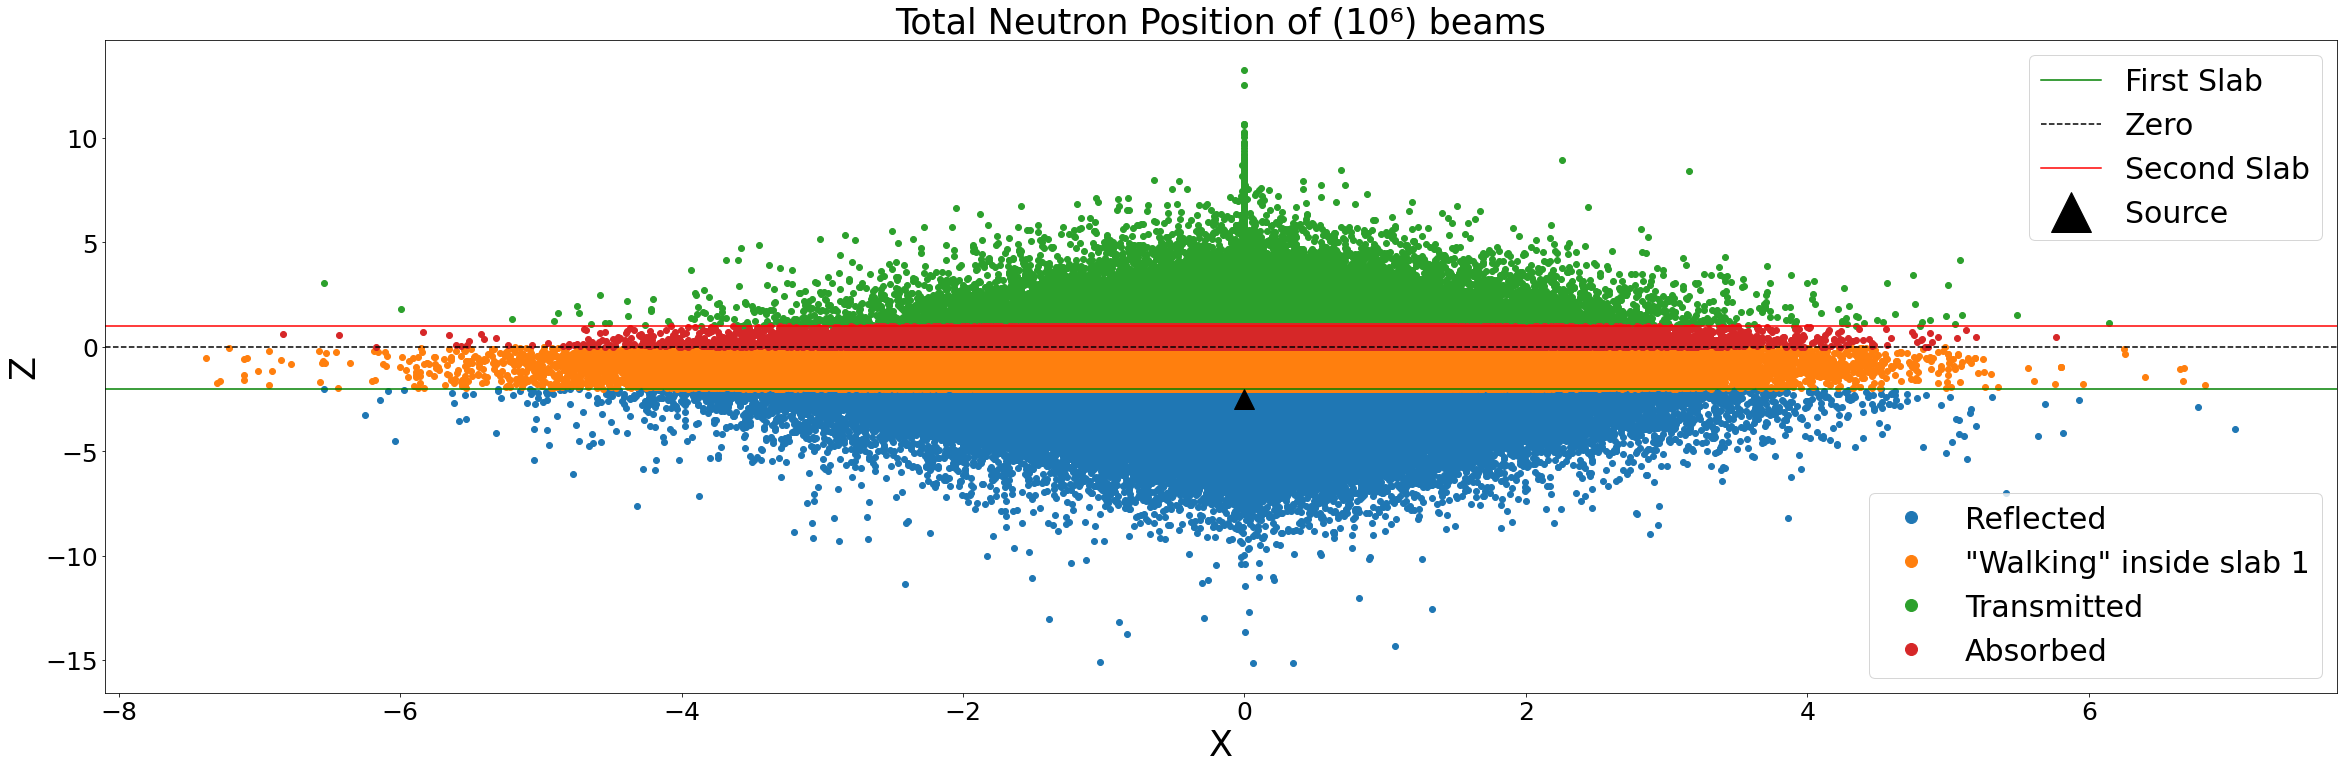

In [ ]:

fig, ax = plt.subplots(figsize=(40,12))



reflete,=plt.plot(pxr,pzr,'o')
andando,=plt.plot(pxs,pzs,'o')
transmitida, = plt.plot(pxt,pzt,'o')
absorvida , =plt.plot(pxa,pza,'o')
plt.axhline(y=-z1, color='g', linestyle='-',label='First Slab')
plt.axhline(y=0, color='k', linestyle='--',label='Zero')
plt.axhline(y=z2, color='r', linestyle='-',label='Second Slab')
pontoFonte=-z1-0.5
plt.plot(0,pontoFonte,'^k',label='Source',markersize=20)
leg1 = plt.legend(loc = 'best',fontsize=30,markerscale=2)
leg2 = plt.legend([reflete,andando,transmitida,absorvida],['Reflected','"Walking" inside slab 1','Transmitted','Absorbed'],loc='lower right',fontsize=30,markerscale=2)

plt.xlabel('X',fontsize=35)
plt.ylabel('Z',fontsize=35)
plt.tick_params(labelsize=25)
ax.add_artist(leg1)

ax.set_title(f"Total Neutron Position of (10⁶) beams",fontsize=35)

# Distribution of absorbed particles

Text(0.5, 1.0, 'Position of the Absorbed Neutrons (409195)')

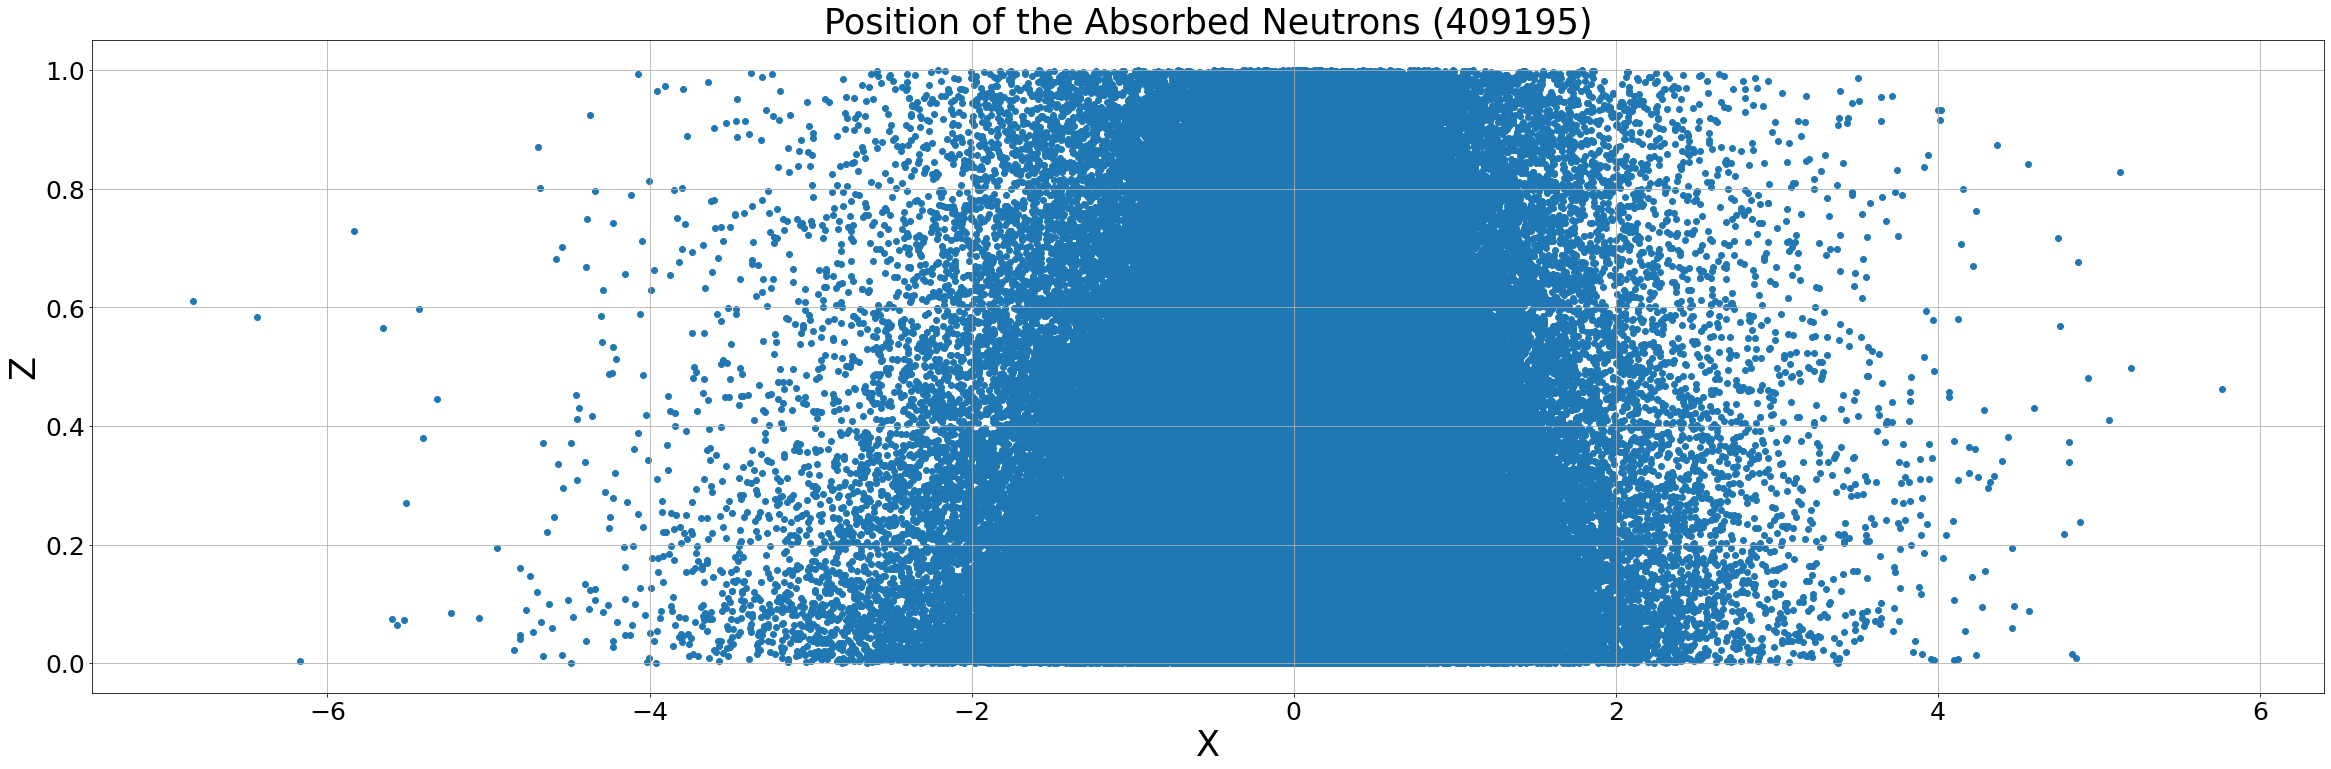

In [ ]:

#fig, ax = plt.subplots(figsize=(20,6))
fig, ax = plt.subplots(figsize=(40,12))
plt.grid()
plt.scatter(pxa,pza)
plt.xlabel('X',fontsize=35)
plt.ylabel('Z',fontsize=35)
plt.tick_params(labelsize=25)
ax.set_title(f"Position of the Absorbed Neutrons ({len(pxa)})",fontsize=35)

<H1> Probability Density Function (PDF)</H1> 
<H2> 

$fX(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^{2}}$ 



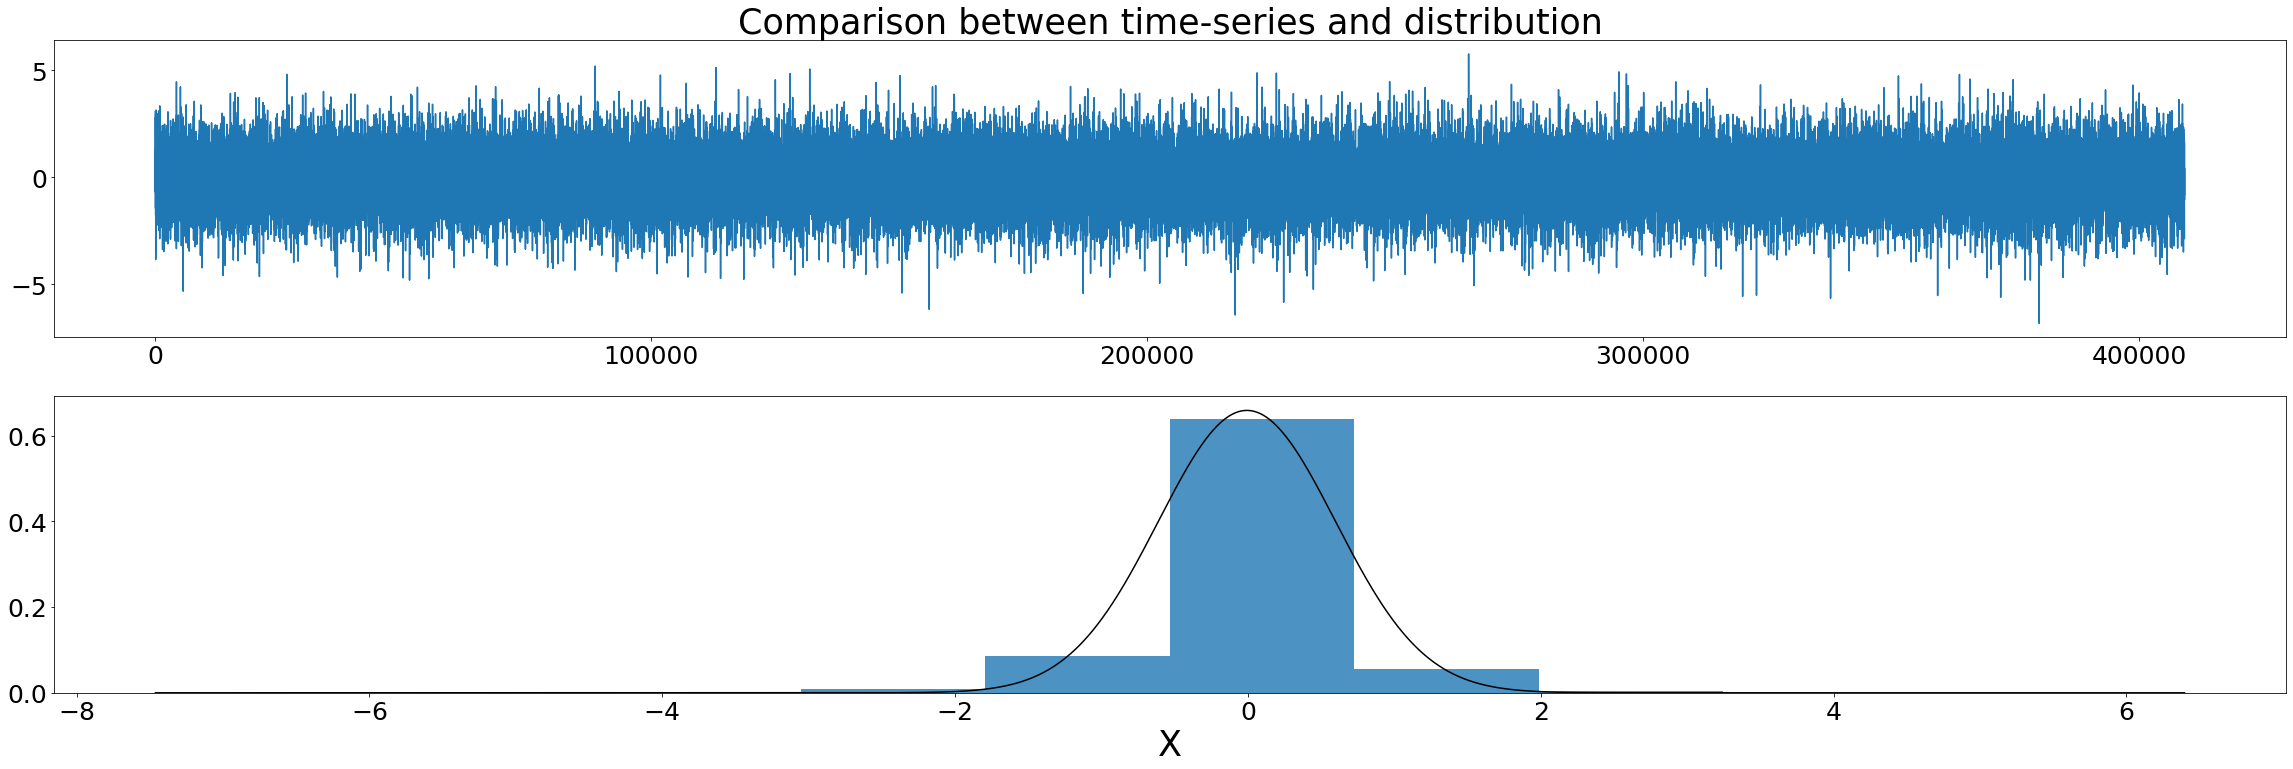

In [ ]:
fig, ax = plt.subplots(figsize=(40,12))

plt.subplot(211)
plt.plot(pxa)
plt.title("Comparison between time-series and distribution",fontsize=35)

plt.tick_params(labelsize=25)

plt.subplot(212)
plt.hist(pxa,density=True, stacked=True,alpha=0.8,bins=10)
xmin ,xmax = plt.xlim() 
media = st.mean(pxa) 
desvio = np.std(pxa) 
eix= np.linspace(xmin,xmax,10000) 
eiy = norm.norm.pdf(eix,media,desvio)
plt.plot(eix,eiy,'k')
plt.xlabel('X',fontsize=35)
plt.tick_params(labelsize=25)


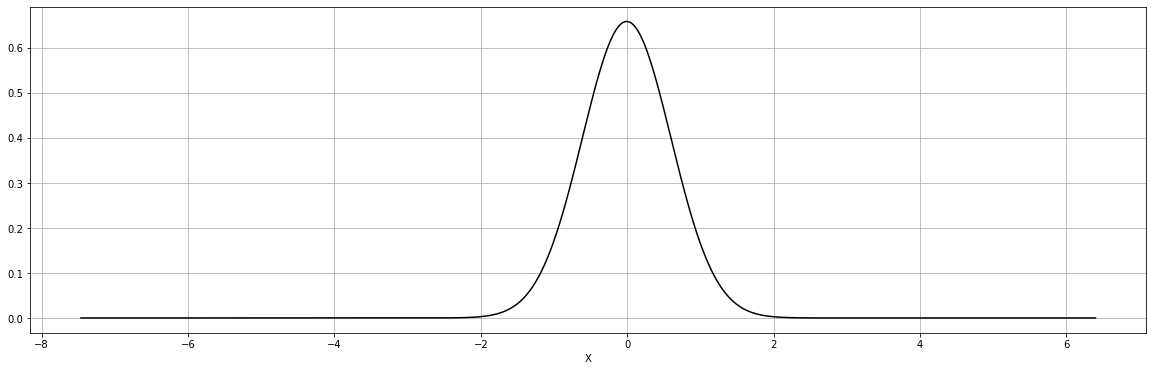

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
eiy = norm.norm.pdf(eix,media,desvio)
plt.plot(eix,eiy,'k')
plt.xlabel("X")
plt.grid()

# Distribution of Transmitted Particles

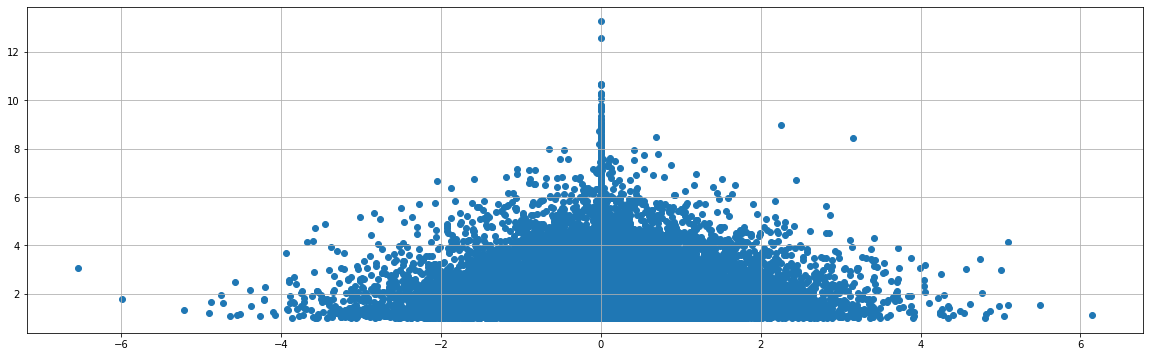

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
plt.scatter(pxt,pzt)



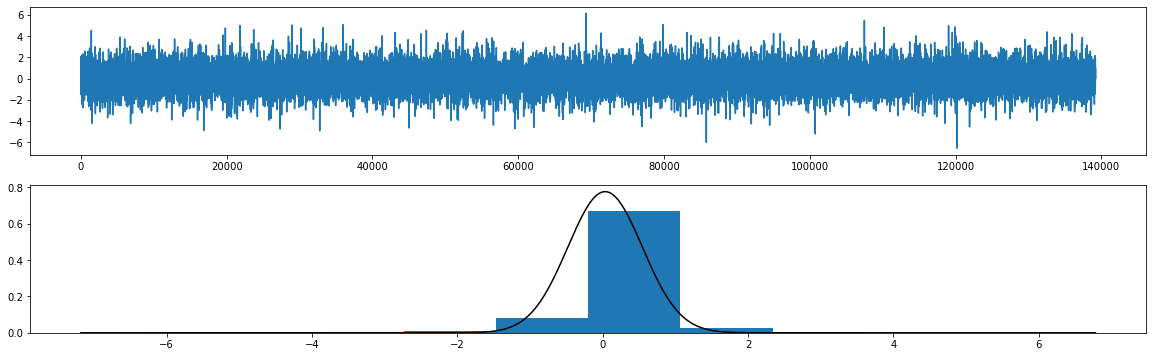

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

plt.subplot(211)
plt.plot(pxt)

plt.subplot(212)
plt.hist(pxt,density=True, stacked=True)
xmin ,xmax = plt.xlim()
media = st.mean(pxt) 
desvio = np.std(pxt) 
eix= np.linspace(xmin,xmax,1000) 
eiy = norm.norm.pdf(eix,media,desvio)
plt.plot(eix,eiy,'k')


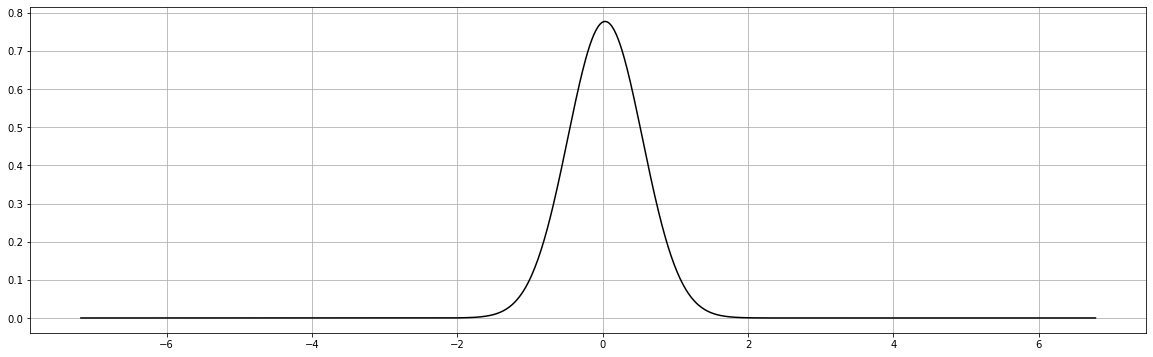

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
eiy = norm.norm.pdf(eix,media,desvio)
plt.plot(eix,eiy,'k')
plt.grid()


# Distribution of Reflected Particles

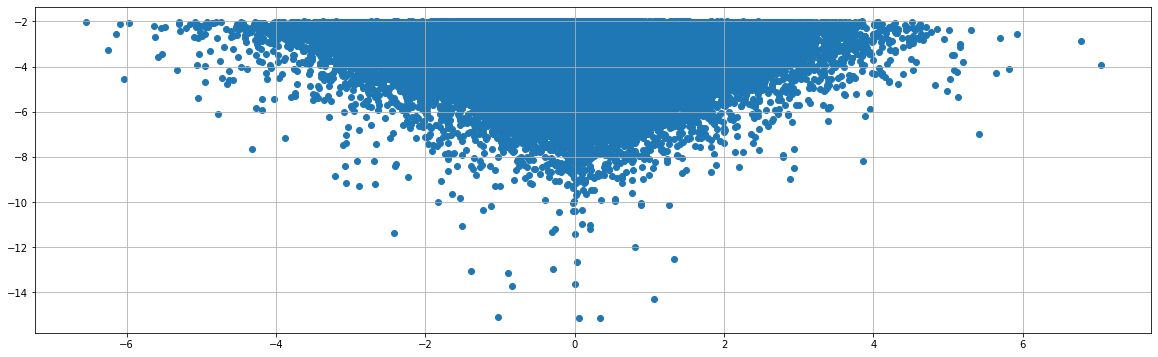

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
plt.scatter(pxr,pzr)



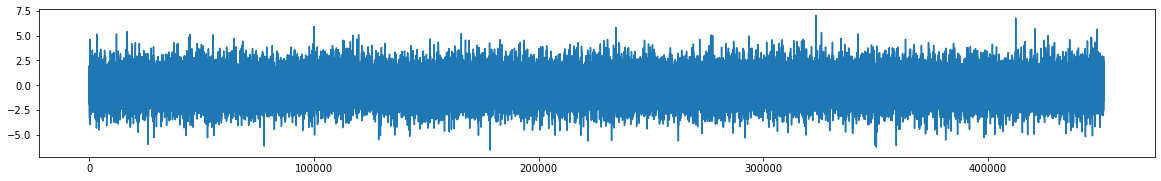

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

plt.subplot(211)
plt.plot(pxr)



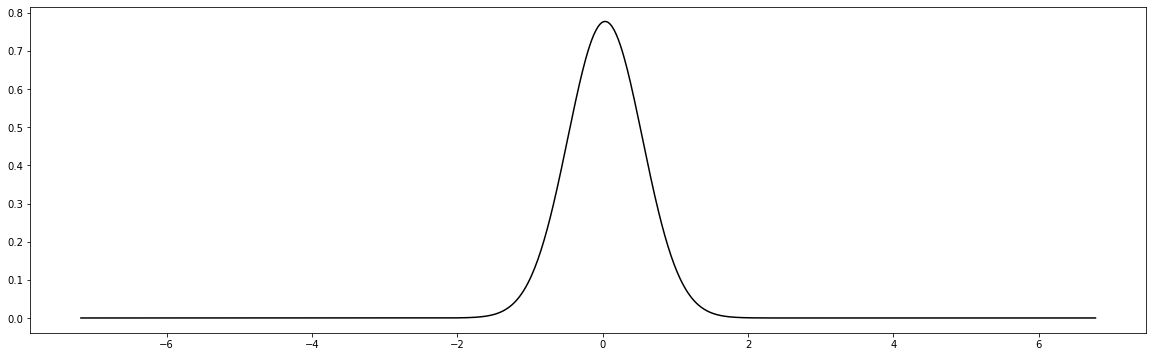

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
eiy = norm.norm.pdf(eix,media,desvio)
plt.plot(eix,eiy,'k')